#**CUSTOMER CLASSIFICATION**

# Tugas Besar Pembelajaran Mesin Tahap ke - 2
## Nama:  Muhammad Zaky Al Fatih - 1301190445
##        Wida Sofiya - 1301191057
# Kelas: IF - 43 - 12

#Import Library

In [1]:
# Mengimport library yang akan diperlukan pada program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random as rd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

#Loading Data

In [2]:
# Import data frame train dan data frame test
df_train = pd.read_csv("https://github.com/MuhammadZaky44/MuhammadZaky44/blob/main/kendaraan_train.csv?raw=true")
df_test = pd.read_csv("https://github.com/MuhammadZaky44/MuhammadZaky44/blob/main/kendaraan_test.csv?raw=true")

#Data Exploration

In [3]:
print("Jumlah dimensi data train:", df_train.shape)
print("Jumlah dimensi data test:", df_test.shape)

Jumlah dimensi data train: (285831, 12)
Jumlah dimensi data test: (47639, 11)


In [4]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [5]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0


### Explore Categorical Variable

In [6]:
df_train_col = df_train.columns
df_train_col

Index(['id', 'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan', 'Tertarik'],
      dtype='object')

In [7]:
df_test_col = df_test.columns
df_test_col

Index(['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan', 'Tertarik'],
      dtype='object')

In [8]:
#Melihat informasi dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [10]:
#Menemukan variabel categorical di data train
s = (df_train.dtypes == 'object')
df_train_categorical = list(s[s].index)
print("Variabel kategori dalam dataset:", df_train_categorical)

Variabel kategori dalam dataset: ['Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak']


In [11]:
#Menemukan variabel categorical di data test
c = (df_test.dtypes == 'object')
df_test_categorical = list(s[s].index)
print("Variabel kategori dalam dataset:", df_test_categorical)

Variabel kategori dalam dataset: ['Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak']


In [12]:
#Melihat variabel categorical data_train
df_train[df_train_categorical].head()

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
0,Wanita,< 1 Tahun,< 1 Tahun
1,Pria,> 2 Tahun,Pernah
2,NaN,< 1 Tahun,Tidak
3,Wanita,1-2 Tahun,Tidak
4,Pria,> 2 Tahun,NaN


In [13]:
#Melihat variabel categorical data_train
df_test[df_test_categorical].head()

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
0,Wanita,1-2 Tahun,Pernah
1,Pria,1-2 Tahun,Pernah
2,Wanita,1-2 Tahun,Pernah
3,Wanita,> 2 Tahun,Pernah
4,Wanita,1-2 Tahun,Pernah


Ada 3 variabel categorical yaitu 'Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak'

In [14]:
# Melihat frequensi dari variabel categorical data train
for var in df_train_categorical: 
    print(df_train[var].value_counts())

Pria      146678
Wanita    124713
Name: Jenis_Kelamin, dtype: int64
1-2 Tahun    142761
< 1 Tahun    117378
> 2 Tahun     11417
Name: Umur_Kendaraan, dtype: int64
Pernah       137123
Tidak        134519
< 1 Tahun         1
Name: Kendaraan_Rusak, dtype: int64


In [15]:
# data index ke 0 didrop karene terdapat data noise 
# pada kolom 'Kendaraan_Rusak'
df_train = df_train.iloc[1: , :]

In [16]:
# Melihat frequensi dari variabel categorical data train
# setelah drop noise
for var in df_train_categorical: 
    print(df_train[var].value_counts())

Pria      146678
Wanita    124712
Name: Jenis_Kelamin, dtype: int64
1-2 Tahun    142761
< 1 Tahun    117377
> 2 Tahun     11417
Name: Umur_Kendaraan, dtype: int64
Pernah    137123
Tidak     134519
Name: Kendaraan_Rusak, dtype: int64


In [17]:
#Melihat persentase dari variabel categorical data train
for var in df_train_categorical: 
    print(df_train[var].value_counts()/np.float(len(df_train)))

Pria      0.513165
Wanita    0.436315
Name: Jenis_Kelamin, dtype: float64
1-2 Tahun    0.499461
< 1 Tahun    0.410653
> 2 Tahun    0.039943
Name: Umur_Kendaraan, dtype: float64
Pernah    0.479736
Tidak     0.470626
Name: Kendaraan_Rusak, dtype: float64


In [18]:
#Melihat frequensi dari variabel categorical data test
for var in df_test_categorical: 
    print(df_test[var].value_counts())

Pria      25870
Wanita    21769
Name: Jenis_Kelamin, dtype: int64
1-2 Tahun    24966
< 1 Tahun    20692
> 2 Tahun     1981
Name: Umur_Kendaraan, dtype: int64
Pernah    24041
Tidak     23598
Name: Kendaraan_Rusak, dtype: int64


In [19]:
#Melihat persentase dari variabel categorical
for var in df_test_categorical: 
    print(df_test[var].value_counts()/np.float(len(df_test)))

Pria      0.543042
Wanita    0.456958
Name: Jenis_Kelamin, dtype: float64
1-2 Tahun    0.524066
< 1 Tahun    0.434350
> 2 Tahun    0.041584
Name: Umur_Kendaraan, dtype: float64
Pernah    0.50465
Tidak     0.49535
Name: Kendaraan_Rusak, dtype: float64


In [20]:
#Cek missing value dalam variabel categorical data train
df_train[df_train_categorical].isnull().sum()

Jenis_Kelamin      14440
Umur_Kendaraan     14275
Kendaraan_Rusak    14188
dtype: int64

### Explore Numerical Variable

In [21]:
# Menemukan variabel numeric
df_train_numerical = [var for var in df_train.columns if df_train[var].dtype!='O']
print('Ada {} variabel numerical\n'.format(len(df_train_numerical)))
print('Variabel numeric diantaranya :', df_train_numerical)

Ada 9 variabel numerical

Variabel numeric diantaranya : ['id', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik']


In [22]:
# Melihat variabel numerik dalam train set
df_train[df_train_numerical].head()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
1,2,48.0,1.0,39.0,0.0,25800.0,29.0,158.0,0
2,3,21.0,1.0,46.0,1.0,32733.0,160.0,119.0,0
3,4,58.0,1.0,48.0,0.0,2630.0,124.0,63.0,0
4,5,50.0,1.0,35.0,0.0,34857.0,88.0,194.0,0
5,6,21.0,1.0,35.0,1.0,22735.0,152.0,171.0,0


Ada 9 variabel numerik yaitu 'id', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik'. Variabel 'Tertarik' adalah target.

In [23]:
df_train[df_train_numerical].isnull().sum()

id                       0
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Terdapat 7 variabel numeric yang mempunyai missing value

In [24]:
#Melihat rangkuman statistika dari data train
round((df_train.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
id,285830.0,142916.50,82512.16,2.0,71459.25,142916.5,214373.75,285831.0
Umur,271616.0,38.84,15.52,20.0,25.00,36.0,49.00,85.0
SIM,271426.0,1.00,0.05,0.0,1.00,1.0,1.00,1.0
Kode_Daerah,271524.0,26.41,13.25,0.0,15.00,28.0,35.00,52.0
Sudah_Asuransi,271601.0,0.46,0.50,0.0,0.00,0.0,1.00,1.0
Premi,271261.0,30536.69,17155.03,2630.0,24398.00,31646.0,39378.00,540165.0
Kanal_Penjualan,271531.0,112.02,54.20,1.0,29.00,132.0,152.00,163.0
Lama_Berlangganan,271838.0,154.29,83.69,10.0,82.00,154.0,227.00,299.0
Tertarik,285830.0,0.12,0.33,0.0,0.00,0.0,0.00,1.0


Tidak tertarik 87.75 % dari dataset
Tertarik 12.25 % dari dataset



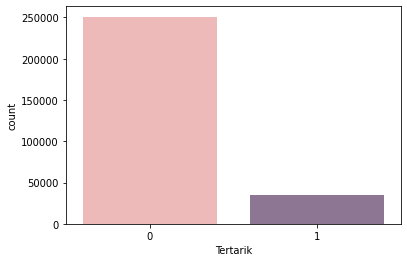

In [25]:
#Melihat distribusi data di variabel target
print('Tidak tertarik', round(df_train['Tertarik'].value_counts()[0]/len(df_train) * 100,2), '% dari dataset')
print('Tertarik', round(df_train['Tertarik'].value_counts()[1]/len(df_train) * 100,2), '% dari dataset\n')
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= df_train, x="Tertarik",palette=colours)

Plot jumlah target menunjukkan imbalance dalam data. Hal ini akan cenderung memberikan akurasi klasifikasi yang menyesatkan.

In [26]:
round((df_test.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
Umur,47639.0,38.82,15.55,20.0,25.0,36.0,49.0,85.0
SIM,47639.0,1.00,0.05,0.0,1.0,1.0,1.0,1.0
Kode_Daerah,47639.0,26.33,13.21,0.0,15.0,28.0,35.0,52.0
Sudah_Asuransi,47639.0,0.46,0.50,0.0,0.0,0.0,1.0,1.0
Premi,47639.0,30626.48,17404.79,2630.0,24395.5,31738.0,39474.5,540165.0
Kanal_Penjualan,47639.0,112.18,54.16,1.0,29.0,135.0,152.0,163.0
Lama_Berlangganan,47639.0,154.45,83.64,10.0,82.0,155.0,227.0,299.0
Tertarik,47639.0,0.12,0.33,0.0,0.0,0.0,0.0,1.0


Berdasarkan korelasi terlihat bahwa fitur 'Sudah_Asuransi', 'Kanal_Penjualan', dan 'Umur' adalah fitur-fitur yang memiliki korelasi yang tinggi dengan 'Tertarik'.

In [27]:
colours=["#f7b2b0","#8f7198", "#003f5c"]

# Data Pre-Processing

## Data Train

In [28]:
# Mengdrop kolom ID karena tidak diperlukan

df_train.drop(['id'], axis=1, inplace=True)

print("Jumlah Data :", len(df_train))
df_train.sample(5)

Jumlah Data : 285830


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
85251,Wanita,45.0,1.0,28.0,1.0,1-2 Tahun,Tidak,39165.0,26.0,166.0,0
204077,Wanita,24.0,1.0,45.0,0.0,< 1 Tahun,NaN,30919.0,152.0,265.0,0
262692,Pria,44.0,NaN,36.0,0.0,1-2 Tahun,Pernah,35937.0,124.0,160.0,0
57243,Pria,30.0,1.0,28.0,0.0,< 1 Tahun,Pernah,NaN,122.0,172.0,0
180790,Wanita,20.0,1.0,43.0,1.0,< 1 Tahun,Tidak,2630.0,160.0,104.0,0


In [29]:
df_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [30]:
# Mengecek data yang bernilai sama pada data train
double = list(df_train.duplicated())
print("Data Double :", double.count(True))

Data Double : 169


In [31]:
# Mengdrop data yang double
df_train.drop_duplicates(inplace=True)

In [32]:
double = list(df_train.duplicated())
print("Data Double :", double.count(True))

Data Double : 0


### Handling Missing Value

In [33]:
# Mengecek persentase data kosong pada data train
df_train.isna().mean().round(4) * 100

Jenis_Kelamin        5.05
Umur                 4.97
SIM                  5.04
Kode_Daerah          5.00
Sudah_Asuransi       4.98
Umur_Kendaraan       5.00
Kendaraan_Rusak      4.97
Premi                5.08
Kanal_Penjualan      5.00
Lama_Berlangganan    4.88
Tertarik             0.00
dtype: float64

In [34]:
# Me-replace nilai null pada data frame, mengganti nilai null tersebut menggunakan modus untuk data categorical
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].fillna(df_train['Umur_Kendaraan'].mode()[0])
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].fillna(df_train['Jenis_Kelamin'].mode()[0])
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].fillna(df_train['Kendaraan_Rusak'].mode()[0])

# Me-replace nilai null pada data frame, mengganti nilai null tersebut menggunakan mean untuk data numerical
df_train = round(df_train.replace(np.NaN, df_train.mean()))

In [35]:
#Cek kembali missing value
df_train.isna().mean().round(4) * 100

Jenis_Kelamin        0.0
Umur                 0.0
SIM                  0.0
Kode_Daerah          0.0
Sudah_Asuransi       0.0
Umur_Kendaraan       0.0
Kendaraan_Rusak      0.0
Premi                0.0
Kanal_Penjualan      0.0
Lama_Berlangganan    0.0
Tertarik             0.0
dtype: float64

### Feature Engineering

In [36]:
def data_labelling(df):
    df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0, 1, 2])
    df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace(['Pria', 'Wanita'], [1, 0])
    df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].replace(['Tidak', 'Pernah', '< 1 Tahun'], [0, 1, 2])

data_labelling(df_train)
print("Sekarang semua fitur numerik")

Sekarang semua fitur numerik


In [37]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0,0
3,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
4,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0,0
5,1,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0


### Menghandle outliers menggunakan metode IQR

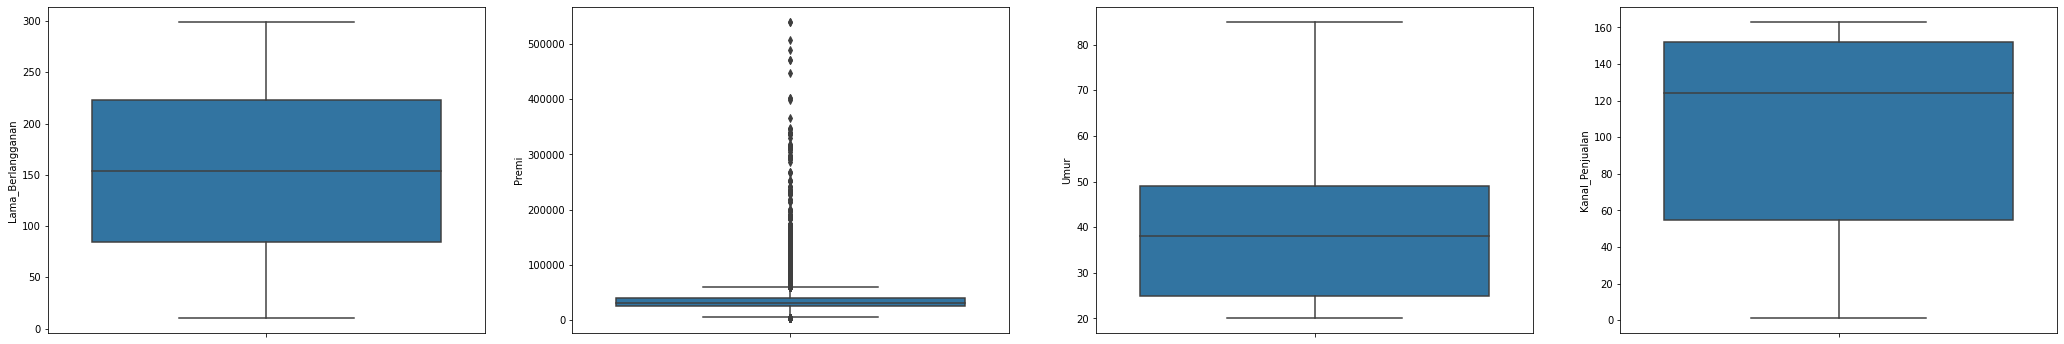

In [38]:
# Mengecek outlier menggunakan boxplot
fig, ax = plt.subplots(ncols=4, figsize=(36, 6))
sns.boxplot(y='Lama_Berlangganan', data=df_train, ax=ax[0])
sns.boxplot(y='Premi', data=df_train, ax=ax[1])
sns.boxplot(y='Umur', data=df_train, ax=ax[2])
sns.boxplot(y='Kanal_Penjualan', data=df_train, ax=ax[3])
plt.show()

In [39]:
df_train_categorical

['Jenis_Kelamin', 'Umur_Kendaraan', 'Kendaraan_Rusak']

In [40]:
df_train_numerical

['id',
 'Umur',
 'SIM',
 'Kode_Daerah',
 'Sudah_Asuransi',
 'Premi',
 'Kanal_Penjualan',
 'Lama_Berlangganan',
 'Tertarik']

In [41]:
# Membuat list yang berisi nama kolom yang ingin dihapus outliersnya
columns = [
        'Lama_Berlangganan', 'Umur', 'Premi', 'Kanal_Penjualan'
]

columns_numerical = [
                     'Umur', 'SIM', 'Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan'
]

In [42]:
# Mendefinisikan fungsi-fungsi yang akan dipakai disini

# Fungsi outliers disini untuk mendapatkan index mana saja yang bersifat outliers dari data frame
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
  return ls

# Fungsi remove disini untuk menghapus outliers dari data frame berdasarkan index yang didapatkan
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [43]:
# Mendefinisikan list kosong index_list yang menyimpan nilai index dari outliers
index_list = []

# Melakukan perulangan sebanyak columns
for col in columns:
  index_list.extend(outliers(df_train,col))  

In [44]:
# Menjadikan data yang bersih dari df_train menjadi df_cleaned_train
df_cleaned_train = remove(df_train, index_list)

print("Jumlah data setelah menghapus outlier:", len(df_cleaned_train))

Jumlah data setelah menghapus outlier: 230630


In [45]:
# Mencetak dataframe train yang sudah di proses menjadi csv
df_cleaned_train.to_csv('df_train_cleaned.csv')
df_cleaned_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0,0
4,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0,0
5,1,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
6,0,33.0,1.0,8.0,0.0,1,1,32435.0,124.0,215.0,1
...,...,...,...,...,...,...,...,...,...,...,...
285826,0,23.0,1.0,4.0,1.0,0,0,25988.0,152.0,217.0,0
285827,0,21.0,1.0,46.0,1.0,0,0,44686.0,152.0,50.0,0
285828,0,23.0,1.0,50.0,1.0,0,0,49751.0,152.0,226.0,0
285829,1,68.0,1.0,7.0,1.0,1,0,30503.0,124.0,270.0,0


### Deklarasi fitur vektor dan target

In [46]:
# Melakukan drop untuk variabel target untuk persiapan skalalisasi variabel vektor
X_df_cleaned_train = df_cleaned_train.drop(['Tertarik'], axis=1) 
y_train = df_cleaned_train["Tertarik"]

In [47]:
y_train

1         0
2         0
4         0
5         0
6         1
         ..
285826    0
285827    0
285828    0
285829    0
285830    0
Name: Tertarik, Length: 230630, dtype: int64

### Feature Scaling

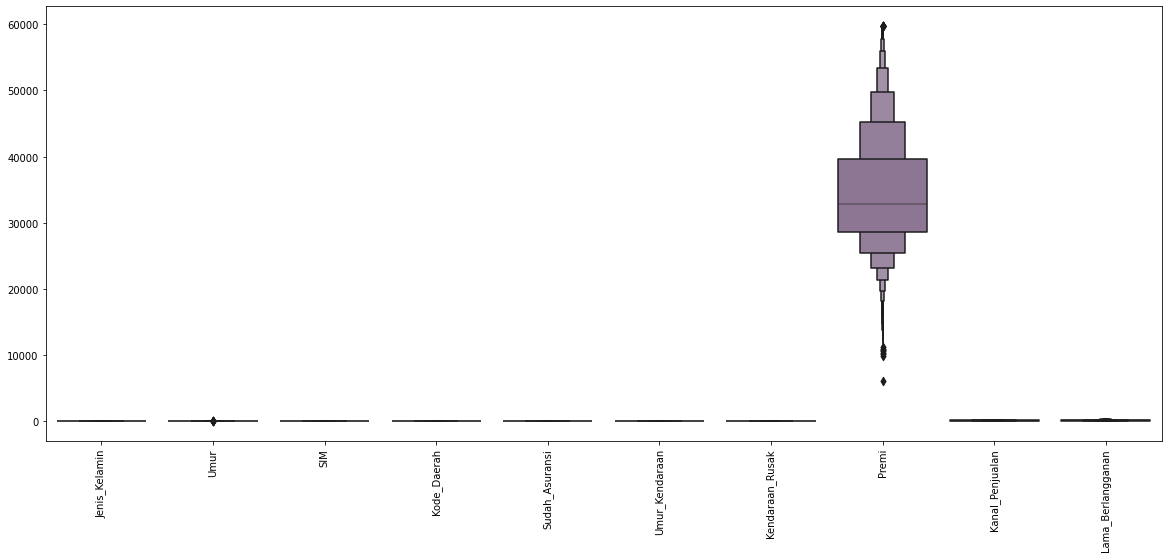

In [48]:
#Melihat skala sebaran data di dalam dataset
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,8))
sns.boxenplot(data = X_df_cleaned_train,palette = shades)
plt.xticks(rotation=90)
plt.show()

Plot di atas menunjukkan range yang berbeda dari semua fitur dataset misalnya, fitur 'Premi' yang memiliki range besar. Untuk menyesuaikan ini ke dalam sebuah model maka harus dilakukan skalalisasi ke range yang sama.

In [49]:
# Feature scaling dengan menggunakan StandarScaller
X_df_scaled_train = (X_df_cleaned_train-X_df_cleaned_train.mean())/X_df_cleaned_train.std()
X_df_scaled_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
1,0.890543,0.646596,0.044705,0.986551,-0.915236,2.491429,0.976114,-1.013723,-1.590106,0.045929
2,0.890543,-1.140621,0.044705,1.537220,1.092610,-1.069807,-1.024466,-0.202020,0.910597,-0.431715
4,0.890543,0.778983,0.044705,0.671883,-0.915236,2.491429,0.976114,0.046654,-0.463835,0.486830
5,0.890543,-1.140621,0.044705,0.671883,1.092610,-1.069807,-1.024466,-1.372568,0.757882,0.205143
6,-1.122906,-0.346302,0.044705,-1.452126,-0.915236,0.710811,0.976114,-0.236910,0.223381,0.744023
...,...,...,...,...,...,...,...,...,...,...
285826,-1.122906,-1.008235,0.044705,-1.766794,1.092610,-1.069807,-1.024466,-0.991713,0.757882,0.768517
285827,-1.122906,-1.140621,0.044705,1.537220,1.092610,-1.069807,-1.024466,1.197415,0.757882,-1.276776
285828,-1.122906,-1.008235,0.044705,1.851888,1.092610,-1.069807,-1.024466,1.790416,0.757882,0.878743
285829,0.890543,1.970461,0.044705,-1.530793,1.092610,0.710811,-1.024466,-0.463105,0.223381,1.417623


In [50]:
X_df_scaled_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Jenis_Kelamin,230630.0,-2.610515e-15,1.0,-1.122906,-1.122906,0.890543,0.890543,0.890543
Umur,230630.0,-2.361817e-16,1.0,-1.206814,-0.942041,-0.081529,0.646596,3.095746
SIM,230630.0,1.268527e-15,1.0,-22.368893,0.044705,0.044705,0.044705,0.044705
Kode_Daerah,230630.0,-1.293378e-15,1.0,-2.081462,-0.901457,0.121214,0.671883,2.009222
Sudah_Asuransi,230630.0,1.488458e-15,1.0,-0.915236,-0.915236,-0.915236,1.092610,1.092610
Umur_Kendaraan,230630.0,-9.409526e-15,1.0,-1.069807,-1.069807,0.710811,0.710811,2.491429
Kendaraan_Rusak,230630.0,1.206093e-15,1.0,-1.024466,-1.024466,0.976114,0.976114,0.976114
Premi,230630.0,-6.659544e-16,1.0,-3.320397,-0.683563,-0.198157,0.599263,2.957451
Kanal_Penjualan,230630.0,1.660944e-15,1.0,-2.124608,-0.998337,0.223381,0.757882,0.967865
Lama_Berlangganan,230630.0,-7.008707e-17,1.0,-1.766667,-0.848122,-0.003060,0.842001,1.772793


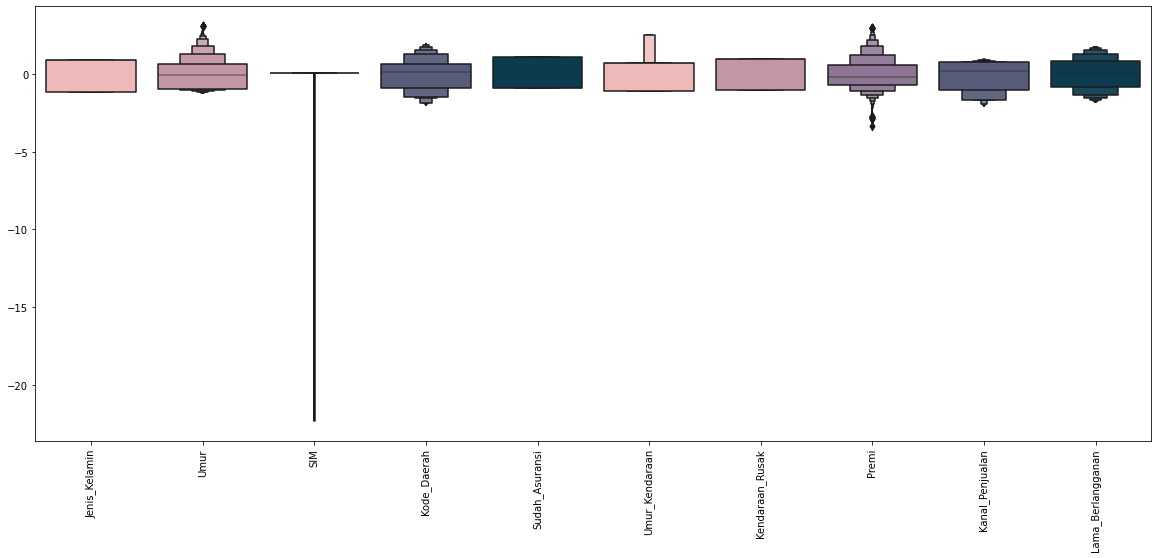

In [51]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,8))
sns.boxenplot(data = X_df_scaled_train,palette = shades)
plt.xticks(rotation=90)
plt.show()

## Data Test

In [52]:
df_test.shape

(47639, 11)

In [53]:
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### Feature Engineering

In [54]:
data_labelling(df_test)
print("Sekarang semua fitur numerik")

Sekarang semua fitur numerik


### Handling Outlier dengan metode IQR

In [55]:
# Mendefinisikan list kosong index_list yang menyimpan nilai index dari outliers
index_list = []

# Melakukan perulangan sebanyak columns
for col in columns:
  index_list.extend(outliers(df_test,col))

In [56]:
# Menjadikan data yang bersih dari df_test menjadi df_cleaned_test
df_cleaned_test = remove(df_test, index_list)
df_cleaned_test.shape

# Mencetak dataframe test yang sudah di proses menjadi csv
df_cleaned_test.to_csv('df_test_cleaned.csv')

### Deklarasi variabel fitur dan target/class

In [57]:
X_df_cleaned_test = df_cleaned_test.drop(['Tertarik'], axis=1) 
y_test = df_cleaned_test["Tertarik"].values

### Feature Scaling

In [58]:
# Menormalisasikan data frame test dan dimasukkan menjadi df_cleaned_test
X_df_scaled_test = (X_df_cleaned_test-X_df_cleaned_test.mean())/X_df_cleaned_test.std()
X_df_scaled_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-1.090272,-1.075484,0.044829,1.927525,-0.922456,0.703491,0.995256,0.242038,0.207967,-0.996279
1,0.917183,0.992898,0.044829,1.927525,-0.922456,0.703491,0.995256,0.952262,0.207967,0.522047
2,-1.090272,-0.946210,0.044829,1.927525,-0.922456,0.703491,0.995256,1.063537,0.207967,0.199254
3,-1.090272,2.544185,0.044829,1.927525,-0.922456,2.471004,0.995256,0.914155,-1.608654,0.641601
4,-1.090272,0.411166,0.044829,1.927525,-0.922456,0.703491,0.995256,-1.806464,-1.608654,0.880707
...,...,...,...,...,...,...,...,...,...,...
47634,0.917183,0.152618,0.044829,-1.985492,-0.922456,0.703491,0.995256,-1.806464,-0.644733,-1.606001
47635,0.917183,0.023344,0.044829,-1.985492,-0.922456,0.703491,0.995256,-1.806464,0.207967,0.545958
47636,0.917183,-0.364478,0.044829,-1.985492,1.084039,-1.064023,-1.004745,-1.806464,0.727001,-0.027898
47637,-1.090272,2.091726,0.044829,-1.985492,-0.922456,0.703491,0.995256,-1.806464,-1.627191,0.856797


In [59]:
X_df_scaled_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Jenis_Kelamin,46368.0,2.792625e-15,1.0,-1.090272,-1.090272,0.917183,0.917183,0.917183
Umur,46368.0,2.758246e-16,1.0,-1.204758,-0.881573,-0.170567,0.669713,2.996644
SIM,46368.0,-1.893944e-15,1.0,-22.306275,0.044829,0.044829,0.044829,0.044829
Kode_Daerah,46368.0,-5.984203e-14,1.0,-1.985492,-0.856737,0.121517,0.723520,1.927525
Sudah_Asuransi,46368.0,6.644343e-15,1.0,-0.922456,-0.922456,-0.922456,1.084039,1.084039
Umur_Kendaraan,46368.0,-9.563898e-15,1.0,-1.064023,-1.064023,0.703491,0.703491,2.471004
Kendaraan_Rusak,46368.0,-3.814821e-15,1.0,-1.004745,-1.004745,0.995256,0.995256,0.995256
Premi,46368.0,-8.229011e-15,1.0,-1.806464,-0.354356,0.141728,0.631382,2.218184
Kanal_Penjualan,46368.0,1.658741e-14,1.0,-2.072078,-1.534507,0.708464,0.727001,0.930908
Lama_Berlangganan,46368.0,1.380524e-16,1.0,-1.725554,-0.864770,0.007968,0.868752,1.729535


# Pemodelan

0    202944
1     27686
Name: Tertarik, dtype: int64


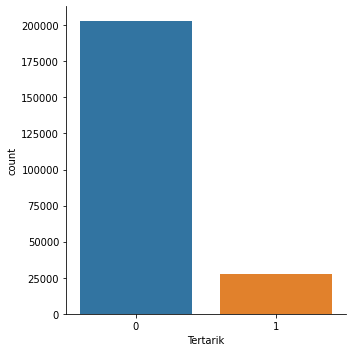

In [60]:
# Evaluasi target dalam dataset untuk mengetahui apakah data imbalance atau tidak
print(df_cleaned_train['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df_cleaned_train, kind='count')

## Logistic Regression

In [61]:
class LogisticReg():
    def __init__(self,l_r,iterasi):        
        self.l_r = l_r       
        self.iterasi = iterasi  
    def fit(self, X_train, y_train):        
        self.training, self.fitur = X_train.shape #Jumlah dari training dan fitur              
        self.Weight = np.zeros(self.fitur) #Inisialisasi parameter 
        self.bias = 0 #inisialisasi bias
        self.X_train = X_train        
        self.y_train = y_train
        self.loss = []
        #learning      
        for i in range(self.iterasi):            
            self.update_weights()           
        return self
    def binary_cross_entropy(self,y_train,y_hat): #hitung binary entropy loss
        training = y_train.shape[0]
        return -(1/training)*np.sum(y_train*np.log(y_hat)+(1-y_train)*np.log(1-y_hat))
    def update_weights(self):           
        y_hat = 1/(1+np.exp(-(self.X_train.dot(self.Weight) + self.bias))) #hitung y_hat
        temp = (y_hat-self.y_train.T)        
        temp = np.reshape(temp,self.training)
        loss = self.binary_cross_entropy(y_train,y_hat) #hitung loss
        self.loss.append(loss)
        dWeight = np.dot(self.X_train.T, temp)/self.training  #hitung turunan parsial
        dbias = np.sum(temp)/self.training
        self.Weight = self.Weight-self.l_r*dWeight  #update weights  
        self.bias = self.bias-self.l_r*dbias #update bias
        print(f"loss after iteration : {loss}") 
        return self
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def predict(self,X_train):    
        y_hat = 1/(1 + np.exp(-(X_train.dot(self.Weight)+self.bias)))        
        y_train = np.where(y_hat>0.5,1,0)        
        return y_train
    def predict_proba(self,X_train):
        y_hat = np.dot(X_train, self.Weight)+self.bias
        return self.sigmoid(y_hat)

### Model training

In [62]:
model = LogisticReg(l_r = 0.1,iterasi = 1000)

In [63]:
model.fit( X_df_scaled_train, y_train )

loss after iteration : 0.6931471805599451
loss after iteration : 0.675512023781814
loss after iteration : 0.6590001199332942
loss after iteration : 0.6435186799466648
loss after iteration : 0.628983060329344
loss after iteration : 0.6153163461917424
loss after iteration : 0.6024488307012241
loss after iteration : 0.59031744215242
loss after iteration : 0.5788651560186423
loss after iteration : 0.5680404178796009
loss after iteration : 0.5577965940724182
loss after iteration : 0.5480914600726711
loss after iteration : 0.5388867316412136
loss after iteration : 0.5301476403028845
loss after iteration : 0.5218425524108179
loss after iteration : 0.513942629599246
loss after iteration : 0.5064215275979443
loss after iteration : 0.4992551299853907
loss after iteration : 0.49242131335361966
loss after iteration : 0.48589974044172984
loss after iteration : 0.4796716779927039
loss after iteration : 0.4737198363477613
loss after iteration : 0.46802822807885064
loss after iteration : 0.46258204325

### Model Predict

In [64]:
Y_pred = model.predict(X_df_scaled_test )

In [65]:
Y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
y_pred_prob = model.predict_proba(X_df_scaled_test)

y_pred_prob [0:5]

array([0.30969603, 0.22943942, 0.30055103, 0.31451111, 0.29100742])

# Naive Baiyes

In [67]:
class GaussianNaiveBayes:

    def fit(self, x, y):
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        n_samples, n_features = x.shape

        # Menghitung priors, rata-rata, dan variansi dari setiap kelas
        # Membuat sebuah array kosong berdasarkan dimensi dari x yang dimana adalah array dataset yang dimasukkan
        self._priors =  np.zeros(n_classes, dtype=np.float64)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)

        # Menghitung mean, variansi, dan prior P(H) untuk setiap kelas
        for idx, c in enumerate(self._classes):
            x_c = x[y==c]
            self._mean[idx, :] = x_c.mean(axis=0)
            self._var[idx, :] = x_c.var(axis=0)
            self._priors[idx] = x_c.shape[0] / float(n_samples)

    # Membuat array multidimensi yang berisi y_pred
    def predict(self, x):
        y_pred = [self._classify(x) for x in x]
        return np.array(y_pred)

    def _classify(self, x):
        posteriors = []

        # Mengkalkulasi posterior untuk mengkalsifikasi setiap kelas
        for index, c in enumerate(self._classes):
            prior = np.log(self._priors[index])
            posterior = np.sum(np.log(self._calculate_likelihood(index, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # Me-return class dengan nilai posterior tertinggi
        return self._classes[np.argmax(posteriors)]
            
    # Menghitung P(E|H) dari data menggunakan nilai mean dan variancenya
    def _calculate_likelihood(self, index_class, x):
         mean = self._mean[index_class]
         var = self._var[index_class]
         num = np.exp(- (x-mean)**2 / (2 * var))
         denom = np.sqrt(2 * np.pi * var)
         return num / denom



In [68]:
from sklearn.metrics import accuracy_score

def accuracy_result(y_test, y_pred):
  accuracy = np.sum(y_test == y_pred) / len(y_test)
  return accuracy

#x_train = df_cleaned_train.drop("Tertarik", axis=1)
x_train = X_df_scaled_train
y_train = df_cleaned_train["Tertarik"]
#x_test = df_cleaned_test.drop("Tertarik",axis=1)
x_test = X_df_scaled_test
y_test = df_cleaned_test["Tertarik"]

nb = GaussianNaiveBayes()
nb.fit(x_train.values, y_train.values)
y_pred = nb.predict(x_test.values)


print(f"Naive Bayes accuracy: {accuracy_result(y_test, y_pred)}\n")
print("\n", classification_report(y_test, y_pred))

Naive Bayes accuracy: 0.6439570393374742


               precision    recall  f1-score   support

           0       0.99      0.60      0.75     40696
           1       0.25      0.97      0.40      5672

    accuracy                           0.64     46368
   macro avg       0.62      0.79      0.57     46368
weighted avg       0.90      0.64      0.70     46368



# Evaluasi

### Confusion Matrix dari Logistic Regression

In [69]:
cm = confusion_matrix(y_test,Y_pred)
print(confusion_matrix(y_test,Y_pred))

[[40677    19]
 [ 5666     6]]


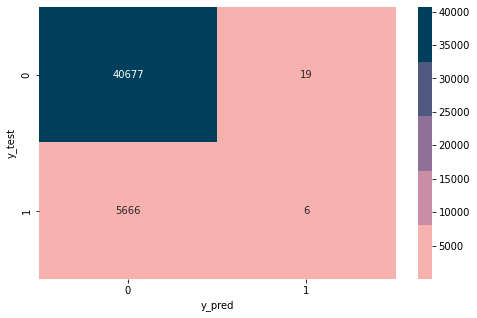

In [70]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax, cmap=shades)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [71]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

### Accuracy

In [72]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8774


In [73]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1226


### Precision and Recall

In [74]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.2400


In [75]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity or True Positive Rate : {0:0.4f}'.format(recall))

Recall or Sensitivity or True Positive Rate : 0.0011


### F1 Score

In [76]:
f1_score = (2*(precision * recall)) / float(precision + recall)
print('F1 Score : {0:0.4f}'.format(f1_score))

F1 Score : 0.0021


###Fall-out

In [77]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate or fall-out : {0:0.4f}'.format(false_positive_rate))

False Positive Rate or fall-out : 0.0005


### Specificity

In [78]:
specificity = TN / (TN + FP)
print('True Negeatif or Specificity : {0:0.4f}'.format(specificity))

True Negeatif or Specificity : 0.9995


### Balanced Accuracy

In [79]:
balanced_acuracy = (recall + specificity) / 2
print('Balanced Accuracy : {0:0.4f}'.format(balanced_acuracy))

Balanced Accuracy : 0.5003


### ROC AUC Curve

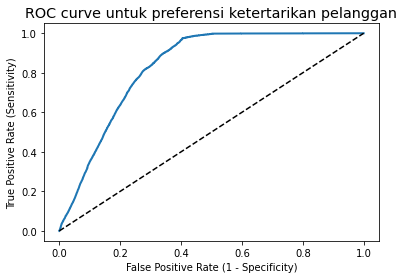

In [80]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve untuk preferensi ketertarikan pelanggan')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8303


### Confusion Matrix dari Naive Bayes

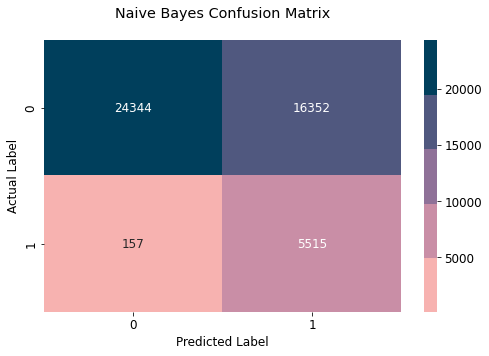

In [82]:
# Membuat confussion matrix menggunakan y_test dan y_pred dari naive bayes
nbm = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(nbm, annot=True, fmt=".0f", ax=ax, cmap=shades)
plt.title("Naive Bayes Confusion Matrix\n")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Eksperimen

## Undersampling

Random Under-Sampling:

In [83]:
df_concat = pd.concat([df_cleaned_train,df_cleaned_test])

In [84]:
print(df_concat['Tertarik'].value_counts())

0    243640
1     33358
Name: Tertarik, dtype: int64


In [85]:
yes_df = df_concat.loc[df_concat['Tertarik'] == 1]
no_df = df_concat.loc[df_concat['Tertarik'] == 0][:33358]

In [86]:
normal_distributed_df = pd.concat([yes_df, no_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
21333,1,23.0,1.0,16.0,1.0,0,0,30548.0,152.0,288.0,0
39069,1,41.0,1.0,10.0,0.0,2,1,36995.0,163.0,193.0,1
248855,1,38.0,1.0,3.0,0.0,1,1,38114.0,124.0,288.0,1
4511,1,20.0,1.0,3.0,0.0,0,1,30548.0,160.0,16.0,0
1394,1,38.0,1.0,26.0,0.0,1,1,40679.0,122.0,104.0,0


Distribusi dalam subsample
1    0.5
0    0.5
Name: Tertarik, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


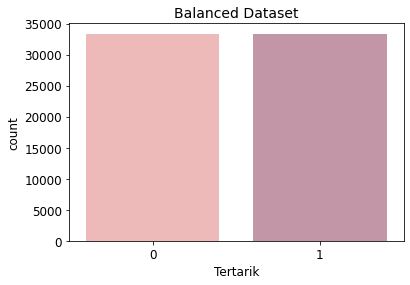

In [87]:
print('Distribusi dalam subsample')
print(new_df['Tertarik'].value_counts()/len(new_df))

sns.countplot('Tertarik', data=new_df, palette=shades)
plt.title('Balanced Dataset', fontsize=14)
plt.show()

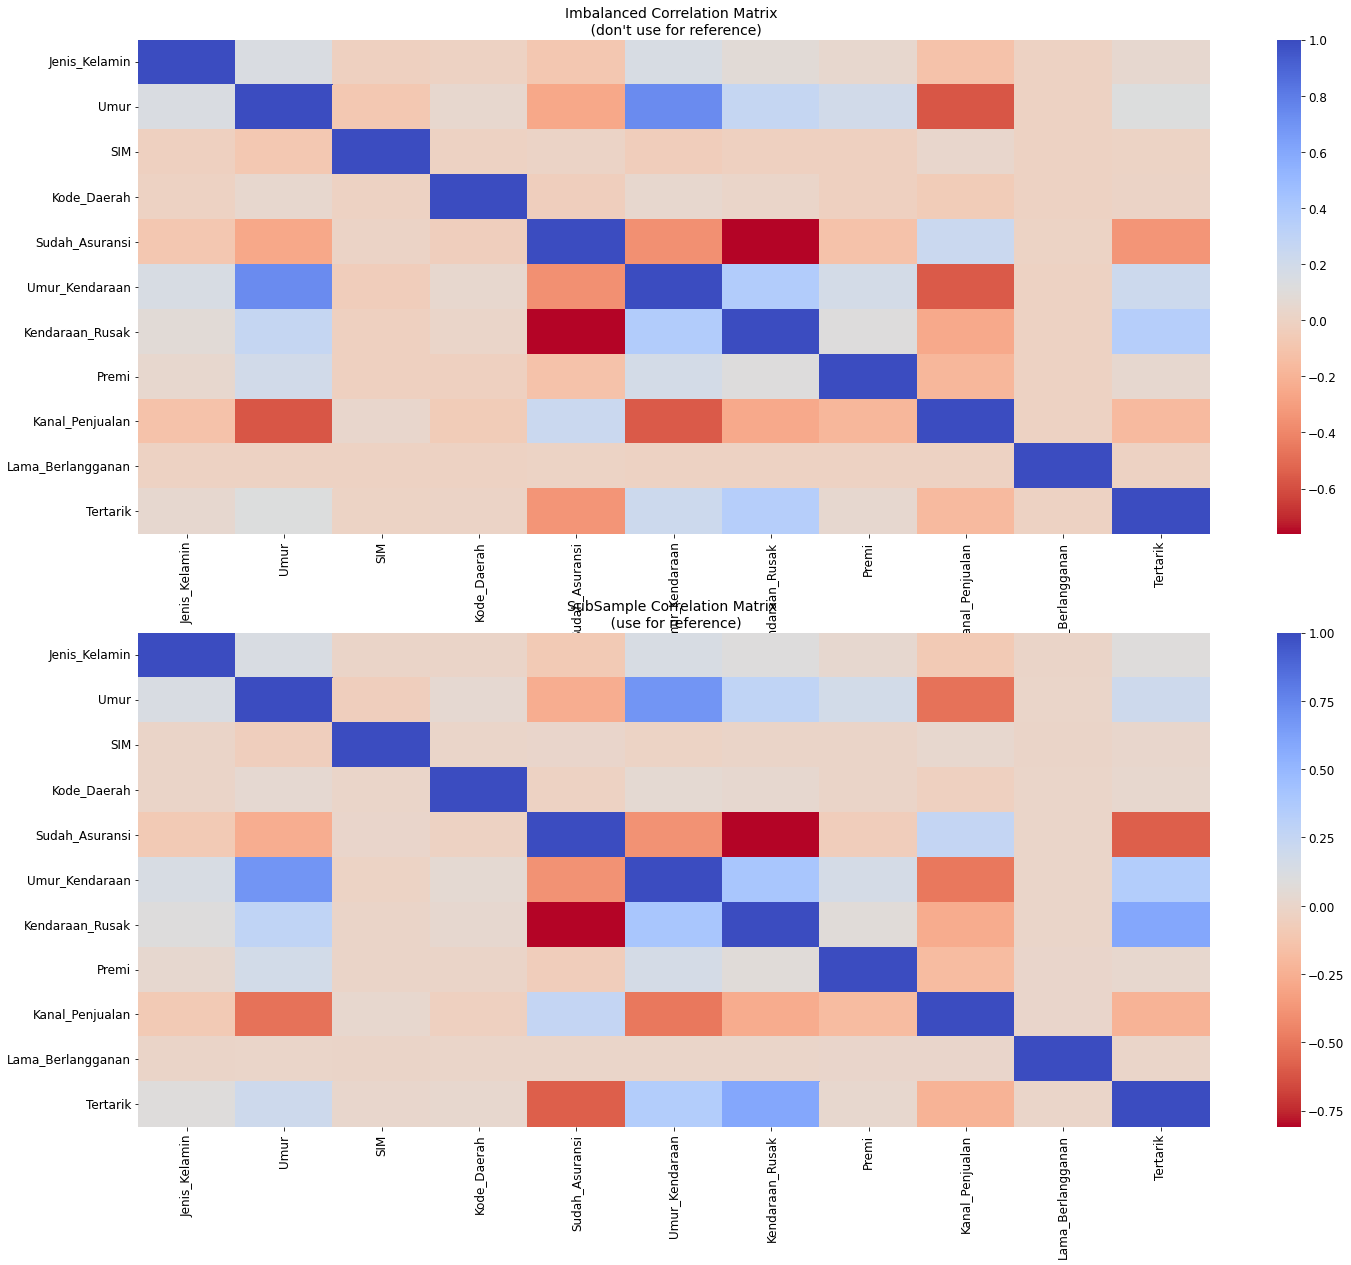

In [88]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
corr = df_cleaned_train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


Temuan
*   Fitur 'Kendaraan_Rusak' memiliki korelasi positif terhadap target artinya pelanggan yang memiliki kendaraan rusak cenderung untuk membeli kendaraan baru
*   Fitur 'Sudah_Asuransi' memiliki korelasi negatif terhadap target.



In [89]:
new_df_X = new_df.drop('Tertarik', axis=1)
new_df_y = new_df['Tertarik']

In [90]:
new_df_X = (new_df_X-new_df_X.mean())/new_df_X.std()

In [91]:
new_df_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Jenis_Kelamin,66716.0,1.376380e-17,1.0,-1.198231,-1.198231,0.834551,0.834551,0.834551
Umur,66716.0,-2.052704e-16,1.0,-1.451407,-0.952664,-0.097674,0.614817,3.179784
SIM,66716.0,-1.747086e-16,1.0,-27.834436,0.035926,0.035926,0.035926,0.035926
Kode_Daerah,66716.0,-1.055786e-16,1.0,-2.195523,-0.710336,0.114767,0.527319,2.095015
Sudah_Asuransi,66716.0,-5.181318e-16,1.0,-0.594750,-0.594750,-0.594750,1.681354,1.681354
Umur_Kendaraan,66716.0,-1.108769e-15,1.0,-1.337528,-1.337528,0.450166,0.450166,2.237859
Kendaraan_Rusak,66716.0,1.319298e-15,1.0,-1.577287,-1.577287,0.633991,0.633991,0.633991
Premi,66716.0,1.394783e-16,1.0,-3.347879,-0.601055,-0.134995,0.605003,2.872175
Kanal_Penjualan,66716.0,-9.552751e-16,1.0,-1.874129,-1.414570,0.386903,0.901610,1.103816
Lama_Berlangganan,66716.0,1.542890e-16,1.0,-1.765984,-0.846690,-0.000940,0.844811,1.776362


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train_new, X_test_new, y_train_new,y_test_new = train_test_split(new_df_X,new_df_y,test_size=0.2,random_state=0)

In [94]:
X_train_new = X_train_new
X_test_new = X_test_new.values
y_train_new = y_train_new.values
y_test_new = y_test_new.values

In [95]:
model_exp = LogisticReg( l_r = 0.3, iterasi = 500 )

In [96]:
model_exp.fit(X_train_new, y_train_new)

loss after iteration : 0.1576148705290084
loss after iteration : 0.14531395246049833
loss after iteration : 0.13742601044154804
loss after iteration : 0.13220623143425242
loss after iteration : 0.12862161369615724
loss after iteration : 0.12607181606164938
loss after iteration : 0.12420076906915874
loss after iteration : 0.12279010809475108
loss after iteration : 0.12170108900105263
loss after iteration : 0.1208425791003895
loss after iteration : 0.12015291546635827
loss after iteration : 0.11958927738632193
loss after iteration : 0.11912125109516657
loss after iteration : 0.11872680948583347
loss after iteration : 0.11838972755863286
loss after iteration : 0.11809787724490493
loss after iteration : 0.11784207588272043
loss after iteration : 0.11761529217266592
loss after iteration : 0.11741208831092592
loss after iteration : 0.11722822144558513
loss after iteration : 0.117060354662829
loss after iteration : 0.11690584457388496
loss after iteration : 0.11676258331296333
loss after iter

In [97]:
 Y_pred_new = model_exp.predict(X_test_new)

In [98]:
y_pred_prob_exp = model.predict_proba(X_test_new)

In [99]:
correctly_classified_us = 0 
count = 0    
for count in range( np.size(Y_pred_new) ) :  
        if y_test_new[count] == Y_pred_new[count] :            
            correctly_classified_us = correctly_classified_us + 1              
        count = count + 1

In [100]:
cm_exp = confusion_matrix(y_test_new, Y_pred_new)

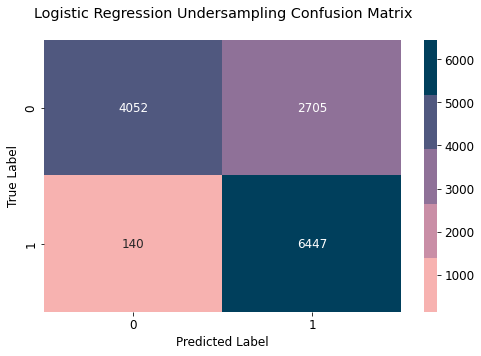

In [101]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_exp, annot=True, fmt=".0f", ax=ax, cmap=shades)
plt.title("Logistic Regression Undersampling Confusion Matrix\n")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [102]:
print( "Accuracy model undersampling       :  ", ( 
      correctly_classified_us / count ) * 100 )

Accuracy model undersampling       :   78.67955635491607


In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [104]:
print(precision_score(y_test_new, Y_pred_new))

0.7044361888111889


In [105]:
print(recall_score(y_test_new, Y_pred_new))

0.9787460148777896


In [106]:
print(f1_score(y_test_new, Y_pred_new))

0.8192388334709956


In [107]:
print(classification_report(y_test_new,Y_pred_new))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74      6757
           1       0.70      0.98      0.82      6587

    accuracy                           0.79     13344
   macro avg       0.84      0.79      0.78     13344
weighted avg       0.84      0.79      0.78     13344



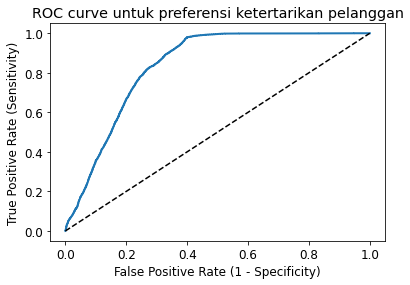

In [108]:
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_prob_exp, pos_label = 1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve untuk preferensi ketertarikan pelanggan')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [109]:
ROC_AUC = roc_auc_score(y_test_new, y_pred_prob_exp)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8351
